## Portfolio Visualizations
This notebook/dashboard contains accumulates all the graphical analysis detailed in the [Portfolio Analysis](portfolio_analysis.ipynb).  The dashboard comprised of the following tabs with graphs from the portfolio analysis and the Backtesting API.

Dashboard Tabs;

1 Welcome

2 Data Analysis

3 Machine Learning Modles

In [101]:
# Import Section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_datareader.data as web
import csv
import seaborn as sns
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

In [102]:
# Initialize the Panel Extensions (for Plotly)
import panel as pn
pn.extension("plotly")

In [103]:
# Import hvplot.pandas after pn.extension
# This avoids plotly initialization failure
import hvplot.pandas

## Panel Visualizations: Functions

In [113]:
# Create a funtions for data visulizations

def create_pie(counts, label, color, title):
        fig, ax = plt.subplots()
        count_slices = [counts[0], counts[1]]
        labels = [label[0], label[1]]
        explode = (0.2, 0)
        colors = [color[0],color[1]]
        plt.pie(count_slices, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
        circle=plt.Circle( (0,0), 0.4, color='white')
        p=plt.gcf()
        p.gca().add_artist(circle)
        plt.title(title[0])
        plt.text(0., 0., 'Thera Bank', horizontalalignment='center', verticalalignment='center')
        plt.close()
        return ax.figure

def create_corr(df):
# Correlation plot
    fig, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(df.corr(),annot=True)
    return ax.figure

# def create_line(df):
#     # Line plot of the px figure 
#     fig = px.line(df, title="Amazon 50 and 100 Day Moving Avearge", 
#                           x='date', y='value', labels = {'date':'Date','value':'Close Price'},
#                           color='variable',height=500, width=900)
#     fig.update_layout(legend_title_text='Amazon', legend = dict(bgcolor = 'light blue'))
    
#     return fig

# def create_bar(df):
#     # Bar plot of the px figure 
#     fig = px.bar(df, x='Stock', y='Sharpe Ratio', 
#                  title="Sharpe Ratios for Profitable Portfolio",
#                  color='Stock', text='Sharpe Ratio',
#                  height=500, width=900)
    
#     fig.update_traces(marker_line_color='rgb(8,48,107)',texttemplate='%{text:.2s}', textposition='outside')
#     return fig

# def create_boxplot(df):
#     # Box plot of the px figure
#     box_plot = px.box(df["profit"], orientation='h', points='all', 
#                                     title="Distribution of SP 500 Stock Profits",
#                                     labels = {'variable':'Stock','value':'Profit'})
    
#     return box_plot
    
# def create_boxplot_pl(df):
#     # Box plot of the px figure
#     box_plot_pl = px.box(profitable_portfolio_df["profit"], orientation='h', points='all', 
#                                     title="Distribution of SP 500 Stock Profit/Loss",
#                                     labels = {'variable':'Stock','value':'Profit'},
#                                     color_discrete_sequence=["red", "green"],
#                                     color=(profitable_portfolio_df['profit'] > 0).map({False: 'Loss',
#                                                     True: 'Gain'}),)
#     return box_plot_pl

## Panel Visualizations: CSV Data Pulls 

In [114]:
# Setup input and output files and locations
filepath = "resources/"
file_csv = Path(filepath + "Bank_Personal_Loan_Modelling.csv")

# Read the data into a dataframe
loan_df = pd.read_csv(file_csv)

In [115]:
# Analysis of Binary features
binary_df = ['Personal Loan','Securities Account','CD Account','Online','CreditCard']

# Create dataframe for binary feature counts
counts = pd.DataFrame(binary_df)

for col in binary_df:
    counts = pd.concat([counts,loan_df[col].value_counts()], axis=1, join='inner')

counts = counts.drop(columns = [0])

In [116]:
#Generate and display pie graph of binary features

# Label Dataframe prep for pie graphs
label = pd.DataFrame({'Personal Loan':['Did Not Purchased a Loan', 'Purchased Loan'],
                      'Securities Account': ['Does Own', 'Does Not Own'],
                      'CD Account': ['Does Own', 'Does Not Own'],
                      'Online' : ['Online', 'Offline'],
                      'CreditCard' : ['Does Own', 'Does Not Own'] })

# Color Dataframe prep for pie graphs
color = pd.DataFrame({'Personal Loan':['dodgerblue', 'lightskyblue'],
                      'Securities Account': ['darksalmon', 'lightsalmon'],
                      'CD Account': ['darkturquoise', 'turquoise'],
                      'Online' : ['violet', 'plum'],
                      'CreditCard' : ['tan', 'wheat'] })

# Title Dataframe prep for pie graphs
title = pd.DataFrame({'Personal Loan':['Purchased Loan During Last Campaign'],
                      'Securities Account': ['Owns a Securities Account'],
                      'CD Account': ['Own a CD Account'],
                      'Online' : ['Uses Online Banking'],
                      'CreditCard' : ['Owns a Thera Bank CC'] })

personal_loan_plot = create_pie(counts['Personal Loan'], label['Personal Loan'], color['Personal Loan'], title['Personal Loan'])
securities_account_plot = create_pie(counts['Securities Account'], label['Securities Account'], color['Securities Account'], title['Securities Account'])
cd_account_plot = create_pie(counts['CD Account'], label['CD Account'], color['CD Account'], title['CD Account'])
online_plot = create_pie(counts['Online'], label['Online'], color['Online'], title['Online'])
credit_card_plot = create_pie(counts['CreditCard'], label['CreditCard'], color['CreditCard'], title['CreditCard'])

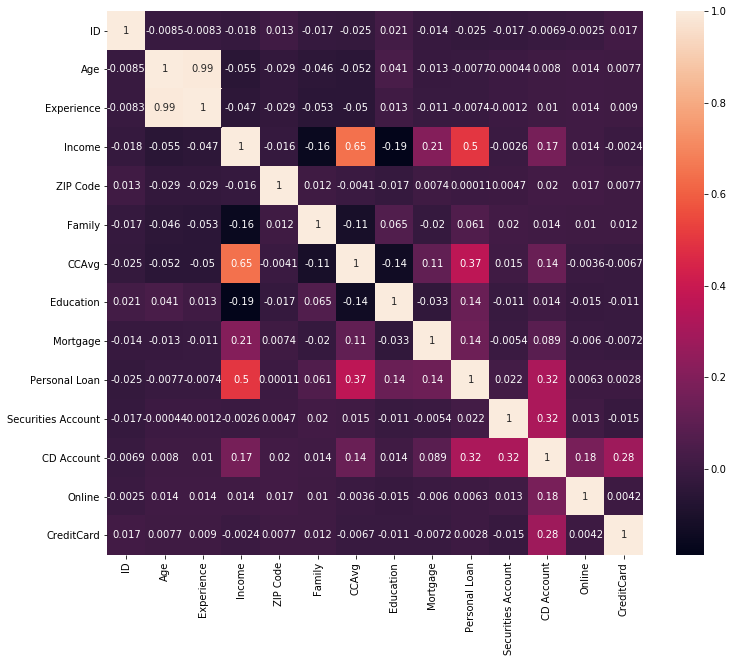

In [117]:
# Calculate the correlation between each column
# Use the `heatmap` function from the Seaborn library to visualize correlations
plt.figure(figsize=(12,10))
corr = sns.heatmap(loan_df.corr(),annot=True)

## Dashboard Setup


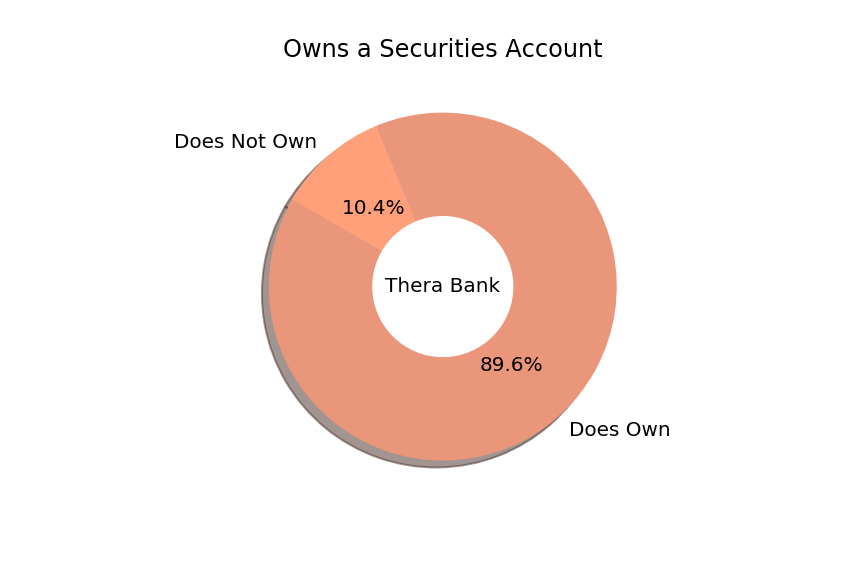
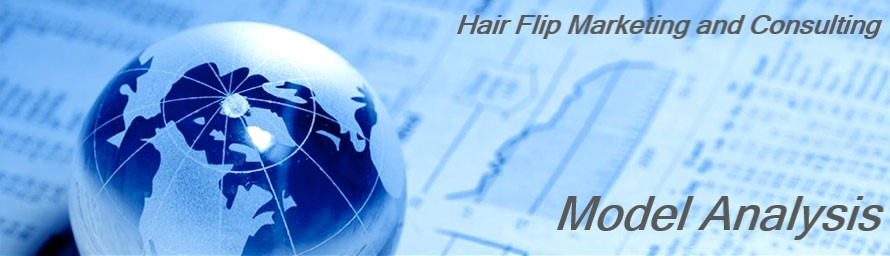
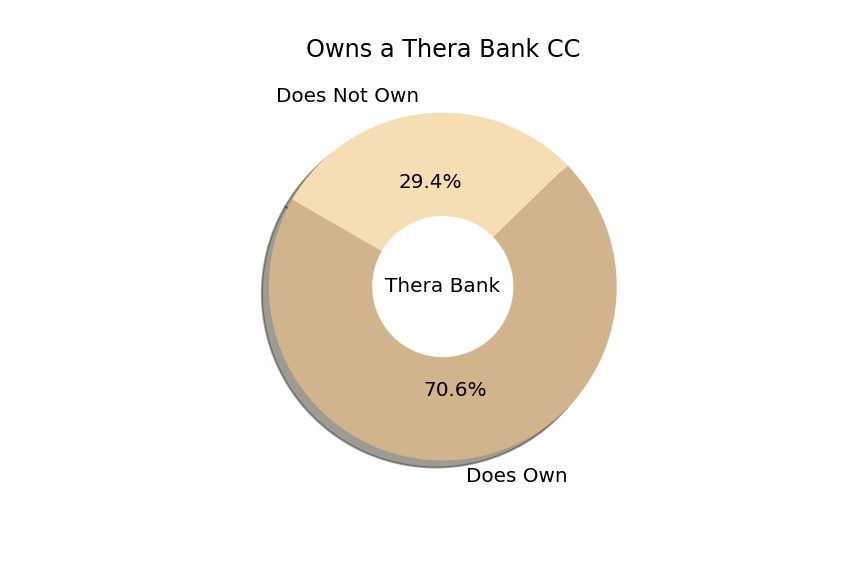
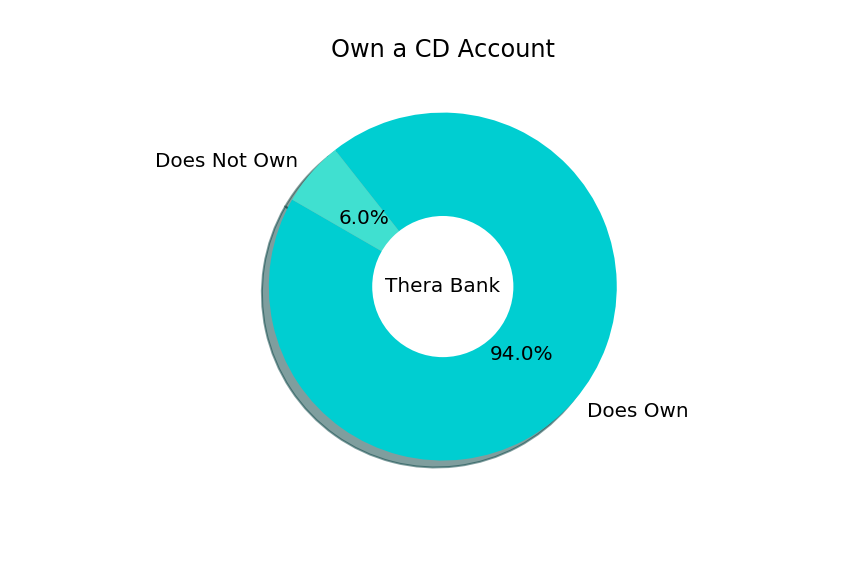
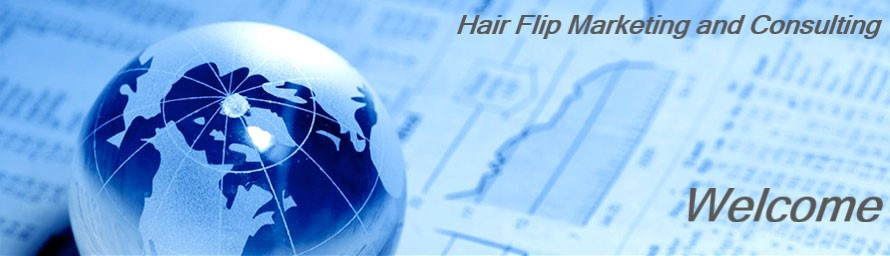
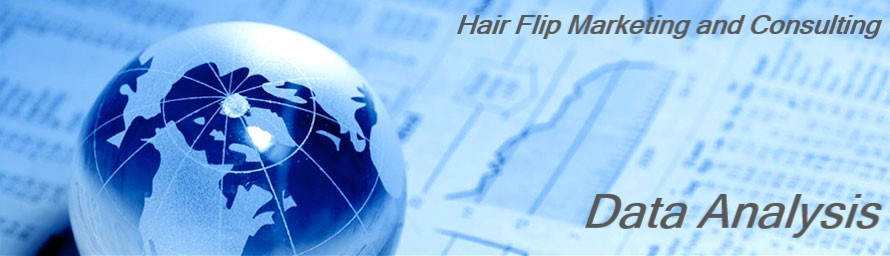
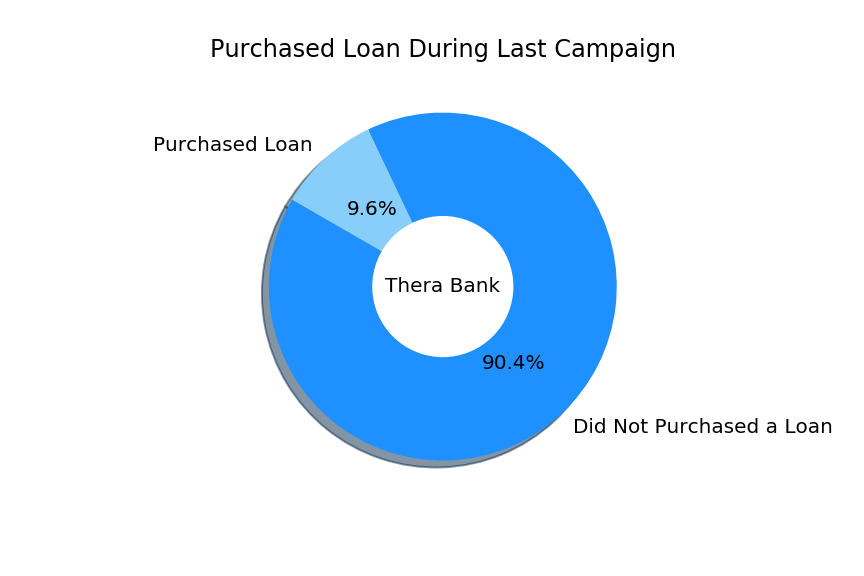
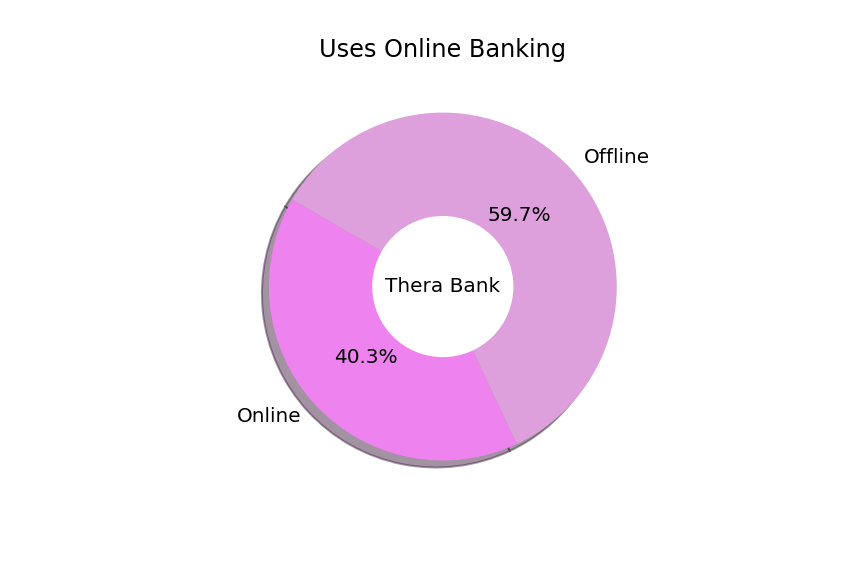
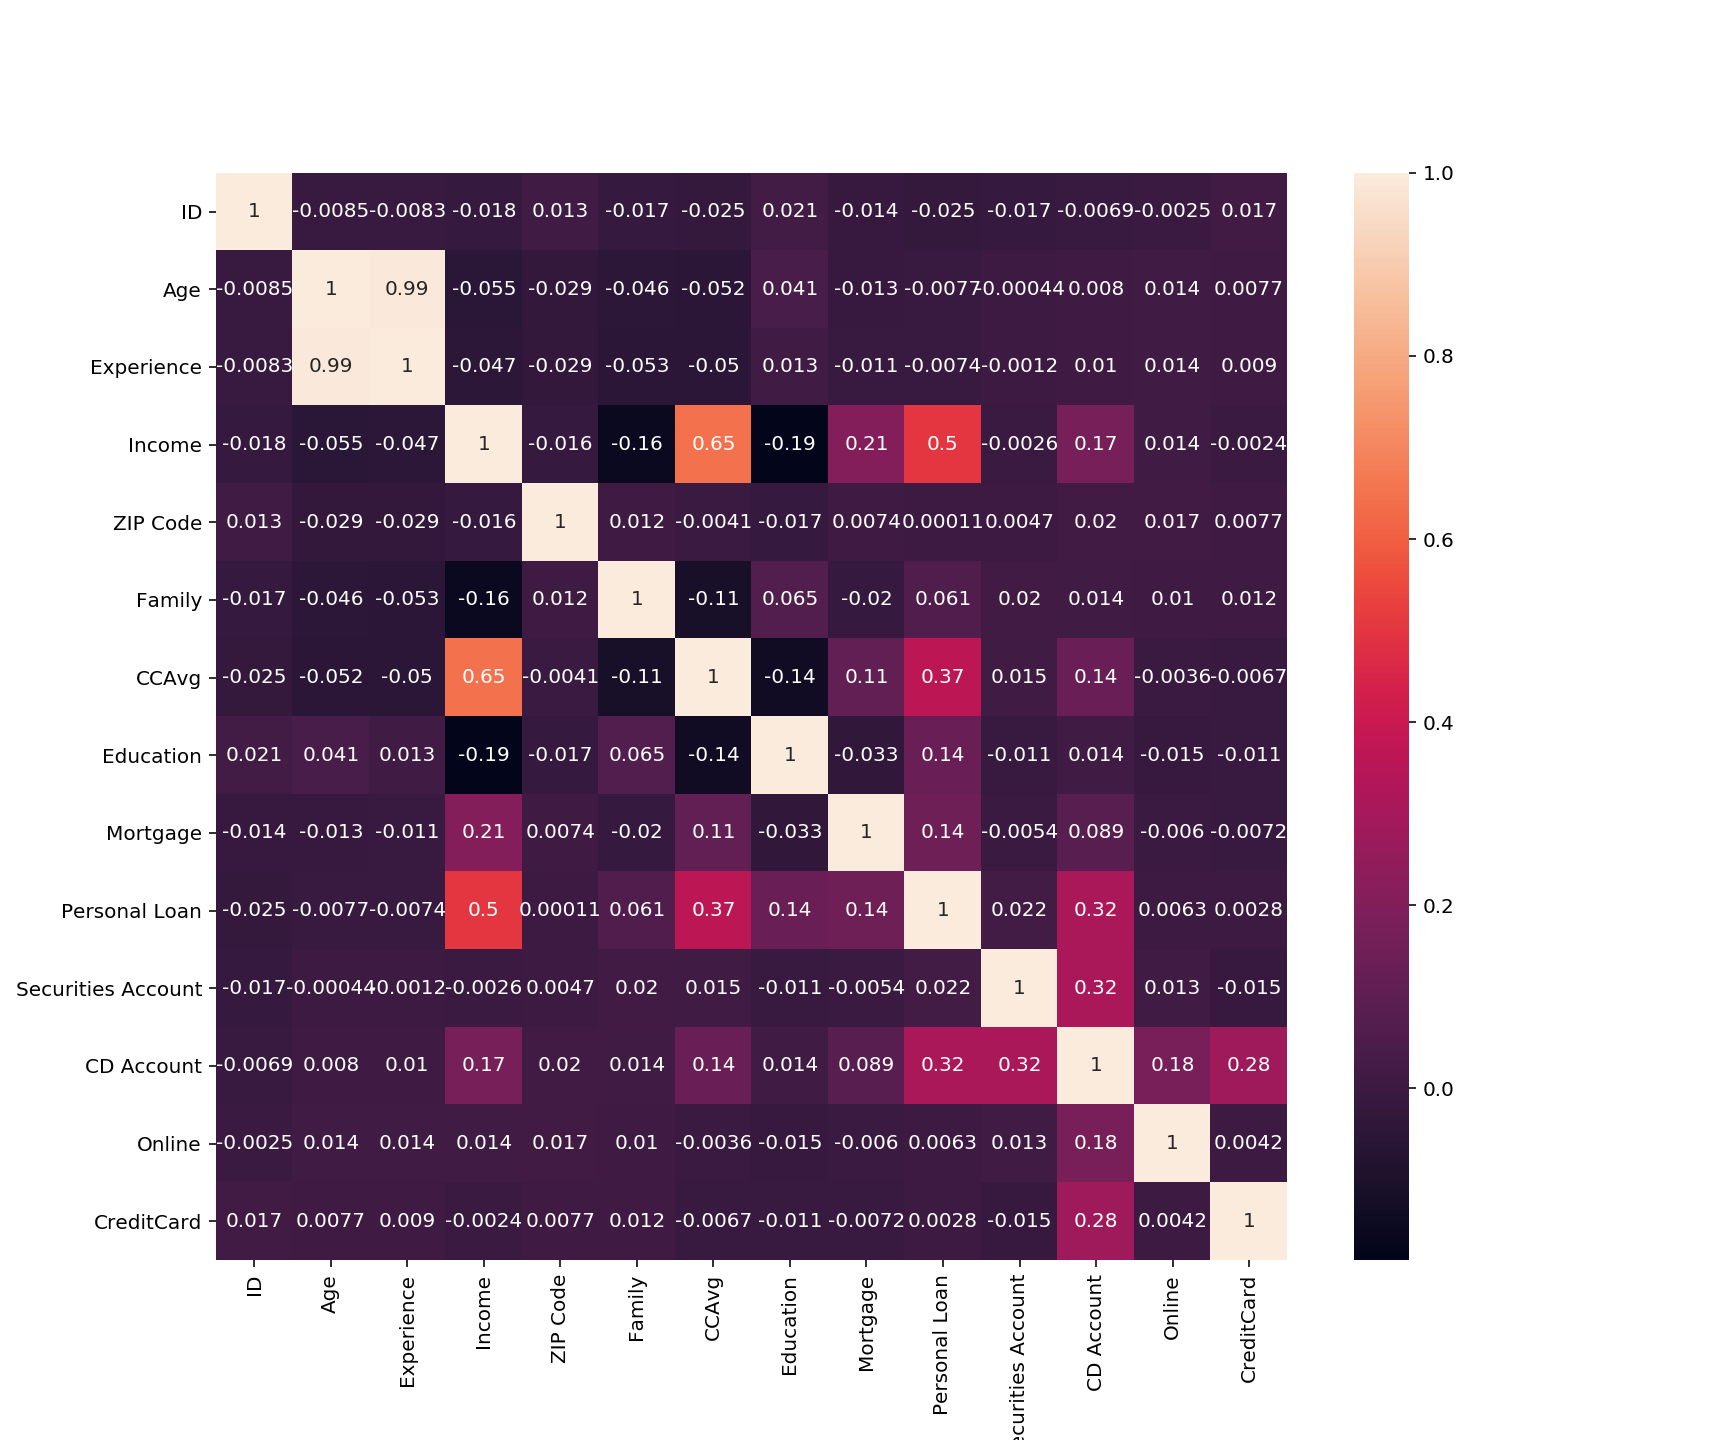
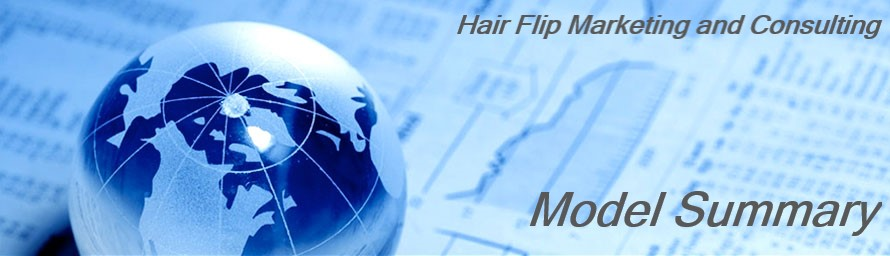

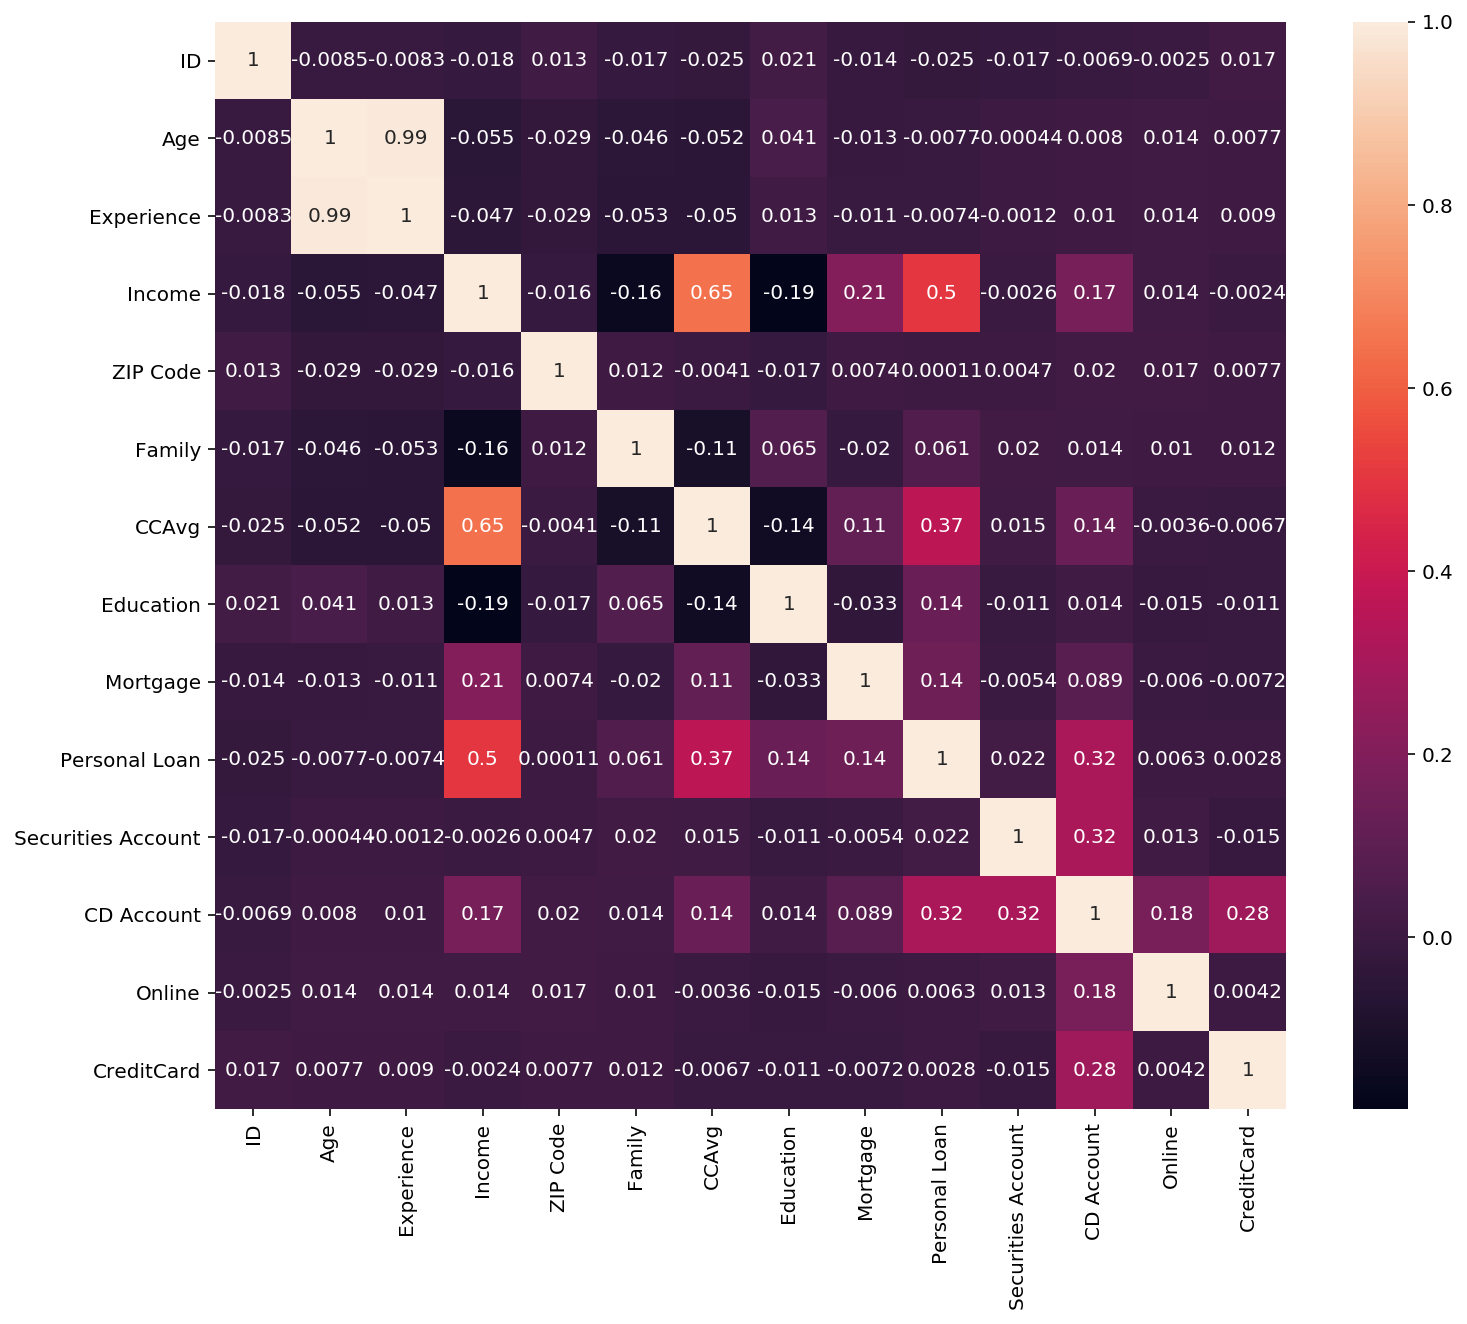

In [124]:
# Dashboard creation:
# Welcome Tab

dash_title = pn.panel("""<h1 style="text-align:center; font-size:20px;color:#8e4a1d;"><b>
                Thera Banking Model Analysis and Proposal</b></h1>""")

# create dashboard description
welcome_desc =pn.panel( """<p style= font-size:16px;color:#3D6782;"><b>
    This dashboard presents a visual analysis of serveral machine learning models that will 
    help Thera Bank identify potential customers who have a higher probability of purchasing a loan.</b></p>""")


#Create Welcome tab details
welcome_image = pn.panel('images/banner.jpg',height=220, width=950)

plot_row_a = pn.Row(personal_loan_plot, securities_account_plot)
plot_row_b = pn.Row(cd_account_plot, online_plot)
plot_col = pn.Column(plot_row_a,
                    plot_row_b,
                    credit_card_plot)


welcome_tab = pn.Column(welcome_image,
                        welcome_desc,
                        plot_col)
#--------------------------------------------------------------------------------------------------------------------------
# Data Analysis Tab
data_desc =pn.panel( """<p style= font-size:16px;color:#3D6782;"><b>
     data analysis</b></p>""")

data_image = pn.panel('images/data_analysis.jpg',height=220, width=950)

# # Add plots to panels
data_plot = pn.panel(corr)

# Create data analysis tab
data_tab = pn.Column(data_image,
                       data_desc,
                       create_corr(loan_df))
#-------------------------------------------------------------------------------------------------------------------------------
# Model Analysis Tab
model_image = pn.panel('images/model_analysis.jpg',height=220, width=950)

# Create tab description text
model_desc = pn.panel( """<p style= font-size:16px;color:#3D6782;"><b>
     model analysis</b></p>""")

# Create model analysis average tab
model_tab = pn.Column(model_image,
                        model_desc)

#-------------------------------------------------------------------------------------------------------------------------------
# Model Summary Tab
summary_image = pn.panel('images/model_summary.jpg',height=220, width=950)

# Create tab description text
summary_desc = pn.panel( """<p style= font-size:16px;color:#3D6782;"><b>
     model summary</b></p>""")

# Create model analysis average tab
summary_tab = pn.Column(summary_image,
                        summary_desc)
#--------------------------------------------------------------------------------------------------------------------------
# Create a tab layout for the dashboard

# #Create the main dashboard
tabs = pn.Tabs(("Welcome",welcome_tab),
                ("Data Analysis", data_tab),
                ("Model Analysis", model_tab),
                ("Model Summary", summary_tab))

dashboard = pn.Column(dash_title,tabs)

# # show the dashboard with the data embedded 
# # (for using in an html download of the notebook so that 
# # no 'callback' is required from the browser to get the data)
# # show the dashboard with the data embedded 
# # (for using in an html download of the notebook so that 
# # no 'callback' is required from the browser to get the data)

dashboard.embed(max_opts = 5)

## Serve the Panel Dashboard

In [125]:
dashboard.servable()
dashboard.show()

Launching server at http://localhost:54235


tornado.application - ERROR - Uncaught exception GET /ws (::1)
HTTPServerRequest(protocol='http', host='localhost:54235', method='GET', uri='/ws', version='HTTP/1.1', remote_ip='::1')
Traceback (most recent call last):
  File "C:\Users\14167\anaconda3\envs\pyvizenv\lib\site-packages\tornado\websocket.py", line 956, in _accept_connection
    open_result = handler.open(*handler.open_args, **handler.open_kwargs)
  File "C:\Users\14167\anaconda3\envs\pyvizenv\lib\site-packages\bokeh\server\views\ws.py", line 135, in open
    raise ProtocolError("Token is expired.")
bokeh.protocol.exceptions.ProtocolError: Token is expired.
